# Income Age 

In [12]:
# Dependencies
import requests
import pandas as pd
from census import Census
import json
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [13]:
# Import U.S. Census API Key
from config import census_key

# Create an instance of the Census library
c = Census(
    census_key,
    year = 2019
)

In [14]:
# Run Census Search to retrieve data on all states (2016 ACS5 Census)
census_data = c.acs5.get(
    (
        "NAME",
        "B19049_001E",
        "B19049_002E",
        "B19049_003E",
        "B19049_004E",
        "B19049_005E"
    ),
    {'for': 'state:*'}
)

# Convert to DataFrame
income_age_2019 = pd.DataFrame(census_data)

# Column renaming
income_age_2019 = income_age_2019.rename(
    columns = {
        "B19049_001E": "Household Income Total",
        "B19049_002E": "Household Income Under 25 years",
        "B19049_003E": "Household Income 25 to 44 years",
        "B19049_004E": "Household Income 45 to 64 years",
        "B19049_005E": "Household Income 65 years and over",
        "NAME": "Name"
    }
)


# Configure the final DataFrame
income_age_2019 = income_age_2019[
    [
        "Name",
        "Household Income Total",
        "Household Income Under 25 years",
        "Household Income 25 to 44 years",
        "Household Income 45 to 64 years",
        "Household Income 65 years and over"
    ]
]

# Rename name to state
income_age_2019 = income_age_2019.rename(columns={"Name":"State"})

# Display DataFrame length and sample data
print(f"Number of rows in the DataFrame: {len(income_age_2019)}")
income_age_2019

Number of rows in the DataFrame: 52


,State,Household Income Total,Household Income Under 25 years,Household Income 25 to 44 years,Household Income 45 to 64 years,Household Income 65 years and over
0,Alabama,50536.0,23691.0,54821.0,60250.0,39518.0
1,Alaska,77640.0,44526.0,80407.0,92391.0,61257.0
2,Arizona,58945.0,33202.0,63679.0,70377.0,47442.0
3,Arkansas,47597.0,28951.0,53066.0,55382.0,37101.0
4,California,75235.0,38389.0,80095.0,88861.0,54428.0
5,Colorado,72331.0,38689.0,78228.0,86829.0,52407.0
6,Delaware,68287.0,34216.0,70605.0,82986.0,54346.0
7,District of Columbia,86420.0,39391.0,101513.0,89041.0,56953.0
8,Connecticut,78444.0,39118.0,81064.0,98647.0,55538.0
9,Florida,55660.0,31906.0,60135.0,65374.0,45008.0


In [15]:
# Read in the housing listing prices to compare to income by age
listing_prices = pd.read_csv("output_data/Median Listing Prices.csv")

In [16]:
income_age = pd.merge(income_age_2019, listing_prices, on=('State'), how='right')

income_age = income_age[["State",
                         "Year_Month_2019",
                         "Median Listing Price_2019",
                         "Household Income Total",
                         "Household Income Under 25 years",
                         "Household Income 25 to 44 years",
                         "Household Income 45 to 64 years",
                         "Household Income 65 years and over"
                        ]]

income_age["Median Listing Price_2019"] = income_age["Median Listing Price_2019"].map("${:,.2f}".format)
income_age["Household Income Total"] = income_age["Household Income Total"].map("${:,.2f}".format)
income_age["Household Income Under 25 years"] = income_age["Household Income Under 25 years"].map("${:,.2f}".format)
income_age["Household Income 25 to 44 years"] = income_age["Household Income 25 to 44 years"].map("${:,.2f}".format)
income_age["Household Income 45 to 64 years"] = income_age["Household Income 45 to 64 years"].map("${:,.2f}".format)
income_age["Household Income 65 years and over"] = income_age["Household Income 65 years and over"].map("${:,.2f}".format)

income_age

,State,Year_Month_2019,Median Listing Price_2019,Household Income Total,Household Income Under 25 years,Household Income 25 to 44 years,Household Income 45 to 64 years,Household Income 65 years and over
0,Pennsylvania,201912,"$219,400.00","$61,744.00","$30,244.00","$70,683.00","$76,132.00","$42,482.00"
1,Utah,201912,"$412,000.00","$71,621.00","$39,030.00","$75,148.00","$89,352.00","$53,720.00"
2,New York,201912,"$462,450.00","$68,486.00","$34,646.00","$77,409.00","$81,723.00","$46,606.00"
3,Colorado,201912,"$473,014.00","$72,331.00","$38,689.00","$78,228.00","$86,829.00","$52,407.00"
4,West Virginia,201912,"$161,000.00","$46,711.00","$25,329.00","$54,660.00","$54,146.00","$37,240.00"
5,Florida,201912,"$329,995.00","$55,660.00","$31,906.00","$60,135.00","$65,374.00","$45,008.00"
6,Wyoming,201912,"$266,500.00","$64,049.00","$31,786.00","$73,705.00","$77,316.00","$45,227.00"
7,Minnesota,201912,"$279,900.00","$71,306.00","$38,836.00","$81,182.00","$86,757.00","$47,971.00"
8,Kansas,201912,"$179,950.00","$59,597.00","$31,637.00","$65,607.00","$73,078.00","$44,416.00"
9,Virginia,201912,"$316,225.00","$74,222.00","$36,933.00","$79,860.00","$90,176.00","$53,323.00"


In [17]:
selected_states = ["California", "Texas", "New York", "Florida", "Illinois"]
selected_housing = income_age[income_age["State"].isin(selected_states)]
selected_housing

,State,Year_Month_2019,Median Listing Price_2019,Household Income Total,Household Income Under 25 years,Household Income 25 to 44 years,Household Income 45 to 64 years,Household Income 65 years and over
2,New York,201912,"$462,450.00","$68,486.00","$34,646.00","$77,409.00","$81,723.00","$46,606.00"
5,Florida,201912,"$329,995.00","$55,660.00","$31,906.00","$60,135.00","$65,374.00","$45,008.00"
12,California,201912,"$551,728.00","$75,235.00","$38,389.00","$80,095.00","$88,861.00","$54,428.00"
20,Illinois,201912,"$231,450.00","$65,886.00","$31,041.00","$72,646.00","$81,223.00","$45,861.00"
34,Texas,201912,"$285,000.00","$61,874.00","$32,170.00","$65,252.00","$74,147.00","$45,521.00"


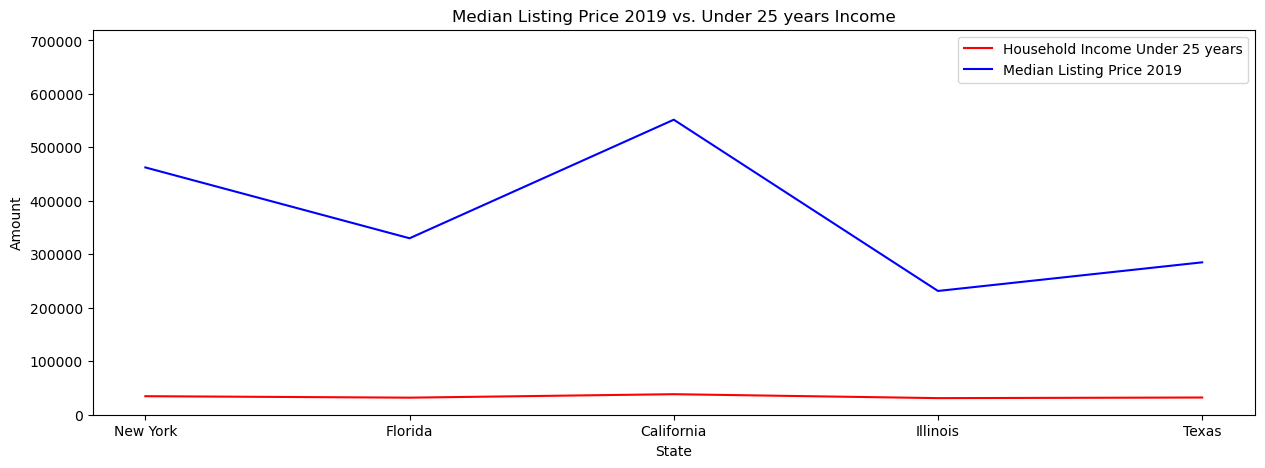

In [18]:
# Plot the difference between house listings and income by age
x_value = selected_housing['State']
selected_housing["Median Listing Price_2019"] = selected_housing["Median Listing Price_2019"].replace('[\$,]', '', regex=True).astype(float)
y_value = selected_housing['Median Listing Price_2019']
x_value2 = selected_housing['State']
selected_housing["Household Income Under 25 years"] = selected_housing["Household Income Under 25 years"].replace('[\$,]', '', regex=True).astype(float)
y_value2 = selected_housing['Household Income Under 25 years']
plt.plot(x_value2,y_value2, color="red", label="Household Income Under 25 years")
plt.plot(x_value,y_value, color="blue", label="Median Listing Price 2019")
plt.title("Median Listing Price 2019 vs. Under 25 years Income")
plt.xlabel("State")
plt.ylabel("Amount")
plt.ylim([0,720000])
plt.legend(loc="upper right")
plt.rcParams["figure.figsize"] = (15,5)
plt.savefig("output_data/Fig12.png")
plt.show()

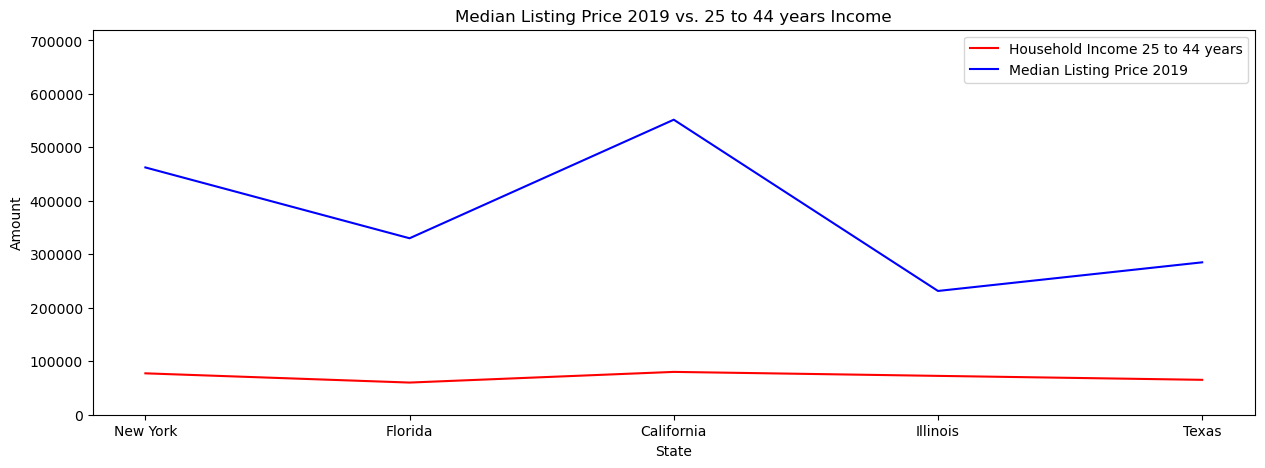

In [19]:
# Plot the difference between house listings and income by age
x_value = selected_housing['State']
selected_housing["Median Listing Price_2019"] = selected_housing["Median Listing Price_2019"].replace('[\$,]', '', regex=True).astype(float)
y_value = selected_housing['Median Listing Price_2019']
x_value2 = selected_housing['State']
selected_housing["Household Income 25 to 44 years"] = selected_housing["Household Income 25 to 44 years"].replace('[\$,]', '', regex=True).astype(float)
y_value2 = selected_housing['Household Income 25 to 44 years']
plt.plot(x_value2,y_value2, color="red", label="Household Income 25 to 44 years")
plt.plot(x_value,y_value, color="blue", label="Median Listing Price 2019")
plt.title("Median Listing Price 2019 vs. 25 to 44 years Income")
plt.xlabel("State")
plt.ylabel("Amount")
plt.ylim([0,720000])
plt.legend(loc="upper right")
plt.rcParams["figure.figsize"] = (15,5)
plt.savefig("output_data/Fig3.png")
plt.show()